## Boston Housing Dataset (data division )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7

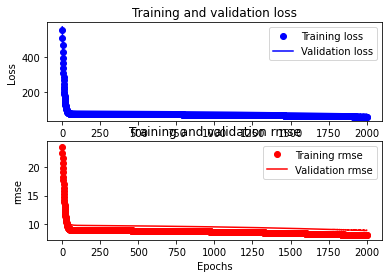

In [1]:
from sklearn.model_selection import train_test_split

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## 데이터 읽어오기.
raw_df = pd.read_csv("../dataset/BostonHousing.csv")

print(raw_df.info())
print(raw_df.head())

dataset=raw_df.copy()
label_data=dataset.pop("MEDV")

# 전체 데이터에서 학습 데이터와 테스트 데이터(0.3)로 구분
X_train1, X_test, Y_train1, Y_test = train_test_split(dataset, label_data, test_size=0.3,shuffle=True)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train1, Y_train1, test_size=0.2,shuffle=True)

# 모델의 설정
input_Layer = tf.keras.layers.Input(shape=(13,))
x = tf.keras.layers.Dense(50, activation='sigmoid')(input_Layer)
x= tf.keras.layers.Dense(100, activation='sigmoid')(x)
x= tf.keras.layers.Dense(300, activation='sigmoid')(x)
Out_Layer= tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()

loss=tf.keras.losses.mean_squared_error
optimizer=tf.keras.optimizers.SGD(learning_rate=0.0003)
metrics=tf.keras.metrics.RootMeanSquaredError()
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=[metrics])

result=model.fit(X_train, Y_train, epochs=2000, batch_size=1000, validation_data=(X_valid, Y_valid))
## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 알 수 있다.
print(result.history.keys())

### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = result.history['loss']
val_loss = result.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 root_mean_squared_error val_root_mean_squared_error key를 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
val_rmse = result.history['val_root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### root_mean_squared_error val_root_mean_squared_error key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'ro', label='Training rmse')
plt.plot(epochs, val_rmse, 'r', label='Validation rmse')
plt.title('Training and validation rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(X_test, Y_test)[1]))
plt.show()



## Boston Housing Dataset (normalization + data division)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7

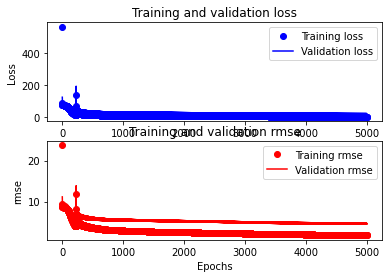

In [2]:
from sklearn.model_selection import train_test_split

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


## 데이터 읽어오기.
raw_df = pd.read_csv("../dataset/BostonHousing.csv")

print(raw_df.info())
print(raw_df.head())

## data copy
dataset=raw_df.copy()
## data label 값 가져오기
label_data=dataset.pop("MEDV")

## 데이터 train/val/test 분리
X_train1, X_test, Y_train1, Y_test= train_test_split(dataset, label_data, test_size=0.3,shuffle=True)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train1, Y_train1, test_size=0.2,shuffle=True)

# train 데이터에서 normalization하기 위한 값들 추출
dataset_stats = X_train.describe()
dataset_stats = dataset_stats.transpose()

def min_max_norm(x):
    return (x - dataset_stats['min']) / (dataset_stats['max'] - dataset_stats['min'])

## train data에서 추출한 값들로 train/val/test 데이터 normalization
normed_train_data = 10*min_max_norm(X_train)
normed_val_data = 10*min_max_norm(X_valid)
normed_test_data = 10*min_max_norm(X_test)


# 모델의 설정
input_Layer = tf.keras.layers.Input(shape=(13,))
x = tf.keras.layers.Dense(50, activation='sigmoid')(input_Layer)
x= tf.keras.layers.Dense(100, activation='sigmoid')(x)
x= tf.keras.layers.Dense(300, activation='sigmoid')(x)
Out_Layer= tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()


loss=tf.keras.losses.mean_squared_error
optimizer=tf.keras.optimizers.SGD(learning_rate=0.005)
metrics=tf.keras.metrics.RootMeanSquaredError()
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=[metrics])

result=model.fit(normed_train_data, Y_train, epochs=5000, batch_size=1000, validation_data=(normed_val_data,Y_valid))
## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 알 수 있다.
print(result.history.keys())

### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = result.history['loss']
val_loss = result.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 root_mean_squared_error val_root_mean_squared_error key를 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
val_rmse = result.history['val_root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### root_mean_squared_error val_root_mean_squared_error key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'ro', label='Training rmse')
plt.plot(epochs, val_rmse, 'r', label='Validation rmse')
plt.title('Training and validation rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(normed_test_data, Y_test)[1]))

plt.show()

